In [8]:
import sys
sys.path.append('../')

In [9]:
import ctn_benchmark

%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from hyperopt import fmin, hp, tpe, Trials, rand
import pickle
import hyperopt

In [10]:
import vision_benchmarks
reload (vision_benchmarks)

<module 'vision_benchmarks' from '../vision_benchmarks.py'>

In [ ]:
def objective(x):
    vals = vision_benchmarks.Vision_Model().run(
        AIT_V1_strength = x['AIT_V1_strength']
        #V1_r_transform = x['V1_r_transform'], 
        #AIT_r_transform = x['AIT_r_transform']
    )
    return {
        'loss': 
            abs(vals['V1_to_AIT'] - 0.04) + abs(vals['AIT_to_PFC'] - 0.03),
        
        'status': hyperopt.STATUS_OK,
    }
trials = Trials()
best = fmin(objective,
            space = {'AIT_V1_strength': hp.uniform('AIT_V1_strength', 0, 1)
                     #'V1_r_transform': hp.uniform('V1_r_transform', 0, 1),
                     #'AIT_r_transform': hp.uniform('AIT_r_transform', 0, 1),
                    },
            algo = rand.suggest,
            max_evals = 50,
            trials = trials
           )
pickle.dump({'Trials': trials, 'Best': best}, open ('AIT_V1_strength_data', 'w'))

In [12]:
print(best)

{'AIT_V1_strength': 0.10606490595473272}


How does this compare to the value that the multi-parameter hyperopt gave for this variable? It's pretty different - the initial value for the AIT_V1_strength parameter is 0.06848695023305285. 

In [14]:
import pandas
import seaborn as sns
data = ctn_benchmark.Data('data')
df = pandas.DataFrame(data.data)

Since benchmarks stores all the data in one folder, I filter the data by removing files that contain non-standard values for the parameters supposedly held constant. 

In [18]:
df = df[df._AIT_r_transform == 0.8079719992231219]
df = df[df._V1_r_transform == 0.11090645719111913]
df

,AIT_to_PFC,MC_to_finger,PFC_to_PMC,PMC_to_MC,V1_to_AIT,_AIT_V1_strength,_AIT_r_transform,_D,_V1_r_transform,__builtins__,...,_gui,_hide_overlay,_motor_feedback,_motor_to_fingers_strength,_motor_transform,_result_feedback,_runtime,_seed,finger_to_end,retina_to_V1
1,0.018,0.021,0.022,0.010,0.024,0.419509,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.034,0.005
7,0.016,0.009,0.026,0.011,0.020,0.948728,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.030,0.007
11,0.019,0.022,0.020,0.015,0.025,0.141630,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.034,0.005
12,0.020,0.027,0.020,0.009,0.025,0.149402,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.038,0.005
13,0.016,0.012,0.026,0.011,0.020,0.881308,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.034,0.007
16,0.019,0.027,0.021,0.009,0.025,0.153216,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.038,0.005
19,0.017,0.018,0.023,0.010,0.023,0.652326,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.027,0.006
22,0.017,0.021,0.024,0.009,0.023,0.507724,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.020,0.006
28,0.017,0.021,0.024,0.009,0.023,0.523833,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.020,0.006
30,0.017,0.013,0.026,0.010,0.021,0.780904,0.807972,32,0.110906,"{u'bytearray': <type 'bytearray'>, u'IndexErro...",...,False,False,0.068487,0.807972,2,0.419509,2,1,0.027,0.006


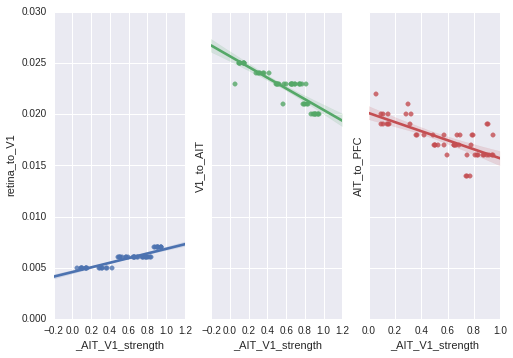

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, sharey = True)
x = '_AIT_V1_strength'
sns.regplot(x, y = 'retina_to_V1', ax = ax1, data = df)
sns.regplot(x, y = 'V1_to_AIT', ax = ax2, data = df)
sns.regplot(x, y = 'AIT_to_PFC', ax = ax3, data = df)